<a href="https://colab.research.google.com/github/The-cheater/Deep_Learning_Models/blob/main/gaf_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install pyts matplotlib pandas


In [32]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/datasets/gait-in-neurodegenerative-disease-database-1.0.0.zip'
extract_path = '/content/gait_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted to:", extract_path)


✅ Extracted to: /content/gait_dataset


In [33]:
# Full path to the subfolder where .ts files are
ts_dir = '/content/gait_dataset/gait-in-neurodegenerative-disease-database-1.0.0'

columns = [
    "Elapsed Time", "Left Stride", "Right Stride",
    "Left Swing", "Right Swing", "Left Swing %",
    "Right Swing %", "Left Stance", "Right Stance",
    "Left Stance %", "Right Stance %",
    "Double Support", "Double Support %"
]


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField
import numpy as np

def analyze_subject(subject_filename):
    # Construct full path
    ts_file = os.path.join(ts_dir, subject_filename)

    if not os.path.isfile(ts_file):
        print(f"❌ File not found: {ts_file}")
        return

    print(f"📄 Analyzing file: {ts_file}")

    # Load time series data
    df = pd.read_csv(ts_file, sep='\s+', names=columns)

    # Plot Time Series (Left Stride Interval)
    plt.figure(figsize=(10, 4))
    plt.plot(df["Elapsed Time"], df["Left Stride"], label="Left Stride Interval")
    plt.xlabel("Elapsed Time (s)")
    plt.ylabel("Stride Interval (s)")
    plt.title(f"Left Stride Interval - {subject_filename}")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Generate MTF Image
    stride_data = df["Left Stride"].dropna().values[:100]
    if len(stride_data) < 2:
        print("⚠️ Not enough data for MTF image.")
        return

    X = stride_data.reshape(1, -1)
    mtf = MarkovTransitionField(n_bins=8, strategy='quantile')
    X_mtf = mtf.fit_transform(X)

    # Plot MTF
    plt.figure(figsize=(5, 5))
    plt.imshow(X_mtf[0], cmap='rainbow', origin='lower')
    plt.title(f"MTF Image - {subject_filename}")
    plt.colorbar()
    plt.show()


📄 Analyzing file: /content/gait_dataset/gait-in-neurodegenerative-disease-database-1.0.0/control6.ts


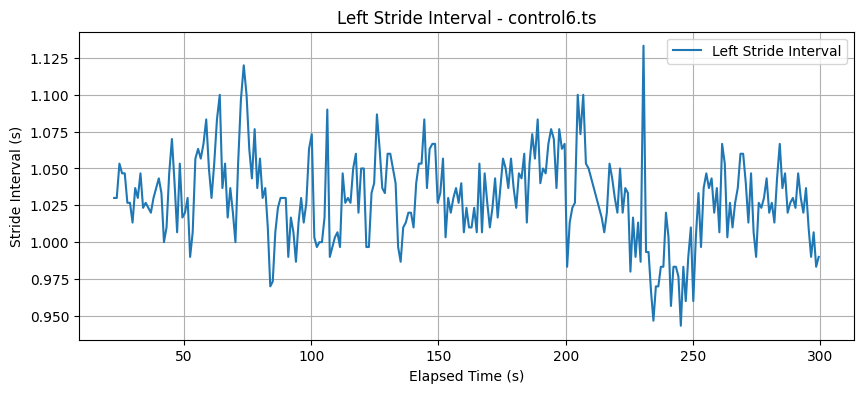

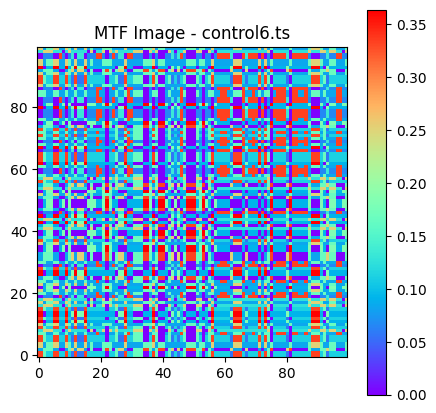

In [35]:
analyze_subject('control6.ts')  # ✅ Make sure filename matches exactly


📄 Analyzing: control1.ts


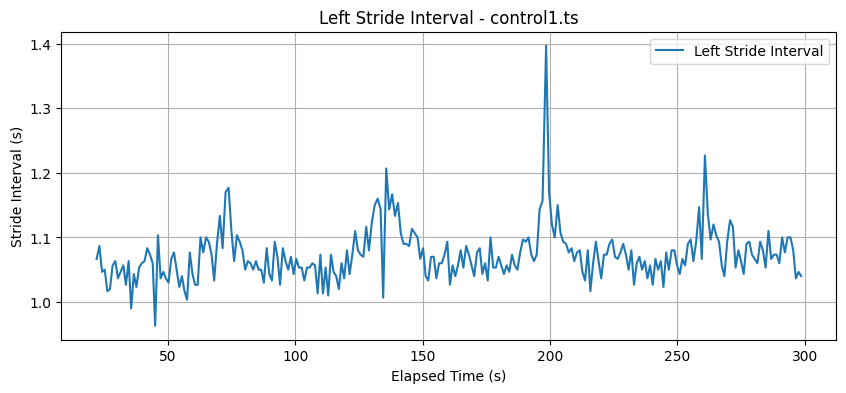

/usr/local/lib/python3.11/dist-packages/pyts/preprocessing/discretizer.py:168: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0]. Consider decreasing the number of bins or removing these samples.
  warn("Some quantiles are equal. The number of bins will "


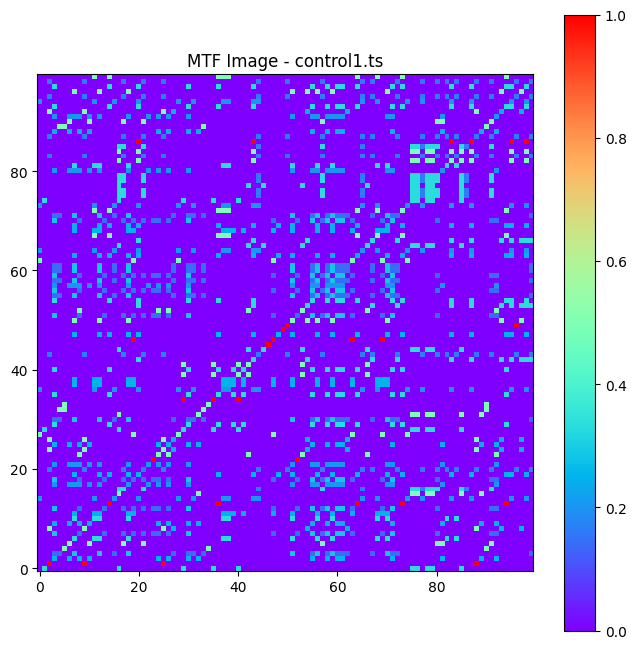

In [49]:
# ✅ Install dependencies
!pip install pyts matplotlib pandas

# ✅ Import modules
import zipfile, os, pandas as pd, matplotlib.pyplot as plt, numpy as np
from pyts.image import MarkovTransitionField

# ✅ Step 1: Extract dataset from Drive (change if needed)
zip_path = '/content/drive/MyDrive/datasets/gait-in-neurodegenerative-disease-database-1.0.0.zip'
extract_path = '/content/gait_dataset'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# ✅ Step 2: Define target directory and columns
ts_dir = '/content/gait_dataset/gait-in-neurodegenerative-disease-database-1.0.0'
columns = [
    "Elapsed Time", "Left Stride", "Right Stride",
    "Left Swing", "Right Swing", "Left Swing %",
    "Right Swing %", "Left Stance", "Right Stance",
    "Left Stance %", "Right Stance %",
    "Double Support", "Double Support %"
]

# ✅ Step 3: Set subject file (choose one: parkNN.ts, huntNN.ts, alsNN.ts)
subject_filename = 'control1.ts'  # 👈 Change this to 'hunt02.ts' or 'als10.ts' etc.
ts_file = os.path.join(ts_dir, subject_filename)

if not os.path.isfile(ts_file):
    print(f"❌ File not found: {ts_file}")
else:
    print(f"📄 Analyzing: {subject_filename}")

    # ✅ Load and display time series
    df = pd.read_csv(ts_file, sep='\s+', names=columns)

    # 📈 Plot left stride interval
    plt.figure(figsize=(10, 4))
    plt.plot(df["Elapsed Time"], df["Left Stride"], label="Left Stride Interval")
    plt.xlabel("Elapsed Time (s)")
    plt.ylabel("Stride Interval (s)")
    plt.title(f"Left Stride Interval - {subject_filename}")
    plt.grid(True)
    plt.legend()
    plt.show()

    # 🧠 Generate MTF image
    stride_data = df["Left Stride"].dropna().values[:100]
    if len(stride_data) < 2:
        print("⚠️ Not enough data for MTF image.")
    else:
        X = stride_data.reshape(1, -1)
        mtf = MarkovTransitionField(n_bins=100, strategy='quantile')
        X_mtf = mtf.fit_transform(X)

        # 🌈 Plot MTF
        plt.figure(figsize=(8, 8))
        plt.imshow(X_mtf[0], cmap='rainbow', origin='lower')
        plt.title(f"MTF Image - {subject_filename}")
        plt.colorbar()
        plt.show()
